# Imports

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.utils import to_categorical, set_random_seed
import sklearn
from sklearn.model_selection import train_test_split
from datetime import datetime
import matplotlib
import matplotlib.pyplot as plt
import random
import numpy as np

random.seed(42)
np.random.seed(42)
tf.keras.utils.set_random_seed(42)

print(f'The tensorflow version is: {tf.__version__}')
print(f'The sklearn version is: {sklearn.__version__}')
print(f'The matplotlib version is: {matplotlib.__version__}')
print(f'The np version is: {np.__version__}')
print(f'The np random is: { np.random.rand() }')


The tensorflow version is: 2.19.0
The sklearn version is: 1.6.1
The matplotlib version is: 3.10.0
The np version is: 2.0.2
The np random is: 0.3745401188473625


# Loading and processing the data

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class.
There are 50000 training images and 10000 test images.

- [CIFAR-10](https://www.cs.toronto.edu/~kriz/cifar.html)

In [ ]:
timeBeg = datetime.now()
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
timeEnd = datetime.now()
timeDiff = timeEnd - timeBeg
timeSecs = timeDiff.total_seconds()
print(f"Data loaded in: {timeSecs} seconds")


Data loaded in: 2.434609 seconds


7 | 4 | 6 | 9 | 2 | 6 | 7 | 4 | 3 | 7 | 
The X shape (image pixels) is: (images, width, height, channels): (50000, 32, 32, 3)
The y shape (10 types of image classes) is: (images, column): (50000, 1)
The X tests (image pixels) is: (images, width, height, channels): (10000, 32, 32, 3)
The y tests (10 types of image classes) is: (images, column): (10000, 1)
RGB scale is: min 0 , max 255
Show image example as an image (ndarray (32, 32, 3))


array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
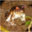

In [ ]:
for ictr in range(1, 11, 1): print(f'{ np.random.randint(0, 10) }', end=' | ')
print()
print(f'The X shape (image pixels) is: (images, width, height, channels): {X_train.shape}')
print(f'The y shape (10 types of image classes) is: (images, column): {y_train.shape}')
print(f'The X tests (image pixels) is: (images, width, height, channels): {X_test.shape}')
print(f'The y tests (10 types of image classes) is: (images, column): {y_test.shape}')
print(f'RGB scale is: min {X_train.min()} , max {X_train.max()}')
print(f'Show image example as an image (ndarray (32, 32, 3))')
X_train[0]

In [ ]:
print(f'Show image example as a converted array; ALL elements are divided by denominator!')
X_train = X_train / 255.0
X_test = X_test / 255.0


Show image example as a converted array; ALL elements are divided by denominator!


In [ ]:
print(f'X_train[0][0][0]: {X_train[0][0][0]}')
X_train[0]
print(f'y_train: {y_train[0]}')
print(f'y_test: {y_test[0]}')
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
print(f'y_train: {y_train[0]}')
print(f'y_test: {y_test[0]}')

X_train[0][0][0]: [0.23137255 0.24313725 0.24705882]
y_train: [6]
y_test: [3]
y_train: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
y_test: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


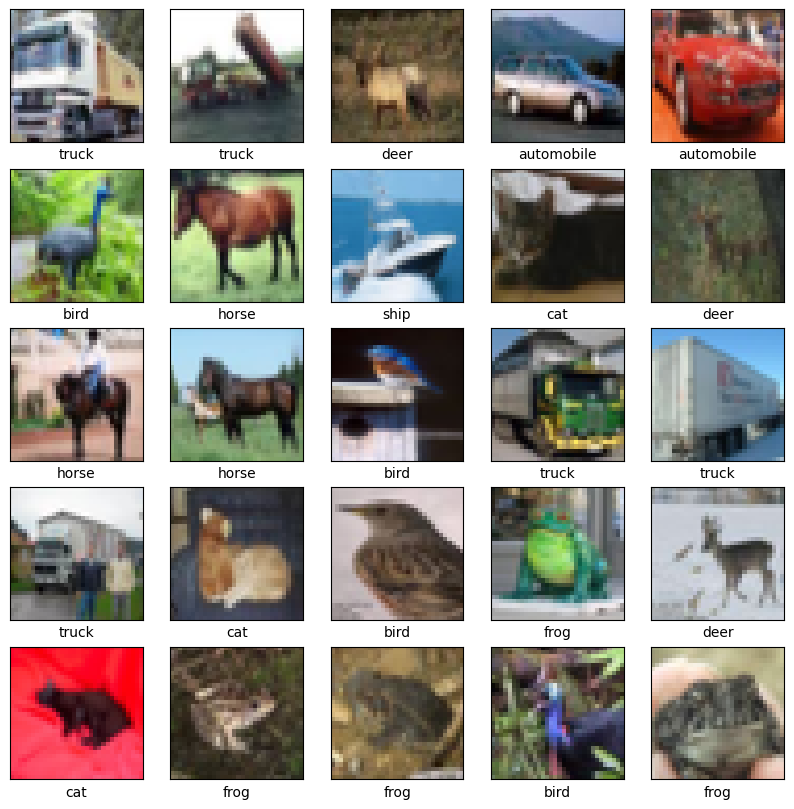

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(1, 26):
  plt.subplot(5, 5, i)
  plt.xticks([])
  plt.yticks([])
  plt.grid(True)
  plt.imshow(X_train[i])
  plt.xlabel(class_names[y_train[i].argmax()])
plt.show()

In [ ]:
print('Split data; Can only be run once.')
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


Split data; Can only be run once.


In [ ]:
print( f'{X_train.shape} , {y_train.shape}' )
print( f'{X_val.shape} , {y_val.shape}' )

(40000, 32, 32, 3) , (40000, 10)
(10000, 32, 32, 3) , (10000, 10)


# Model design

In [ ]:
# conv2d convolutional
# flatten converts matrices into vectors
# dropuut removes 50% of cases to avoid overfitting
print('Creating Model')
model = Sequential([
    Input(shape=(32, 32, 3)),
    Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Creating Model


# Training

In [ ]:
print('Training Model')
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val))

Training Model
Epoch 1/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.2638 - loss: 1.9614 - val_accuracy: 0.4709 - val_loss: 1.4373
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.4391 - loss: 1.5377 - val_accuracy: 0.5413 - val_loss: 1.2810
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4925 - loss: 1.4109 - val_accuracy: 0.5685 - val_loss: 1.2117
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5207 - loss: 1.3417 - val_accuracy: 0.5927 - val_loss: 1.1473
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.5423 - loss: 1.2743 - val_accuracy: 0.6030 - val_loss: 1.1133
Epoch 6/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.5607 - loss: 1.2331 - val_accuracy: 0.6179 - val_loss: 1.0818
Epoch 7/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.5717 - loss: 1.1843 - val_accuracy: 0.6178 - val_loss: 1.0737
Epoch 8/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.5913 -

In [ ]:
print('Saving Model')
model.save('cifar10_model.keras')

Saving Model


# Model evaluation

Evaluating Model
history.history: 20


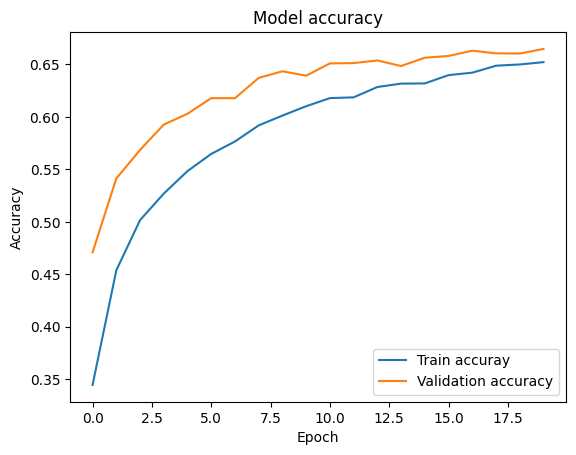

In [ ]:
print('Evaluating Model')
print(f'history.history: { len( history.history["accuracy"] ) }')
plt.plot(history.history['accuracy'], label='Train accuray')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [ ]:
print(f'model.evaluate(X_test, y_test): {model.evaluate(X_test, y_test)}')
predictions = model.predict(X_test[:10])
print(f'predictions: {len(predictions)}')
predicted_classes = predictions.argmax(axis=-1)
print(f'predicted_classes: {predicted_classes}')
true_classes = y_test[:10].argmax(axis=-1)
print(f'true_classes: {true_classes}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6611 - loss: 0.9744
model.evaluate(X_test, y_test): [0.9842838048934937, 0.6597999930381775]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
predictions: 10
predicted_classes: [3 8 8 0 4 6 3 6 3 1]
true_classes: [3 8 8 0 6 6 1 6 3 1]


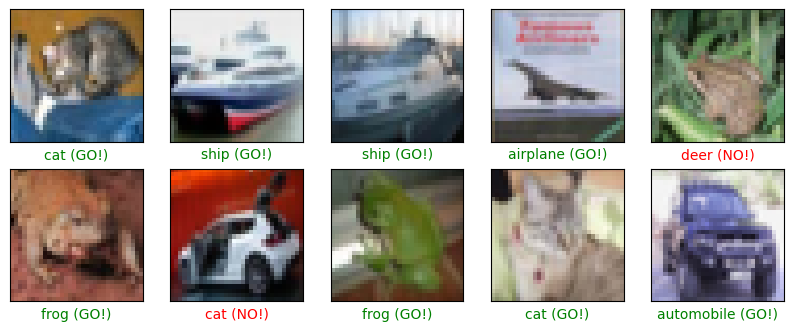

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(1, 11):
    plt.subplot(5, 5, i)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[i-1])
    color = 'green' if predicted_classes[i-1] == true_classes[i - 1] else 'red'
    plt.xlabel(f"{class_names[predicted_classes[i-1]]} ({'GO!' if color == 'green' else 'NO!'})", color = color)
plt.show()